In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import load_boston, fetch_california_housing, fetch_openml
import warnings

#Simple Linear Regression with only 2 attributes (Area and Price)

In [ ]:
df_train = pd.read_csv('data/train.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [ ]:
df_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
train = pd.DataFrame(columns=['Area','Price'])
train['Area'] = df_train[['SQUARE_FT']]
train['Price'] = df_train[['TARGET(PRICE_IN_LACS)']].apply(lambda x: x*100000)

In [ ]:

train.head()

,Area,Price
0,1300.236407,5500000.0
1,1275.000000,5100000.0
2,933.159722,4300000.0
3,929.921143,6250000.0
4,999.009247,6050000.0


In [ ]:
%matplotlib inline

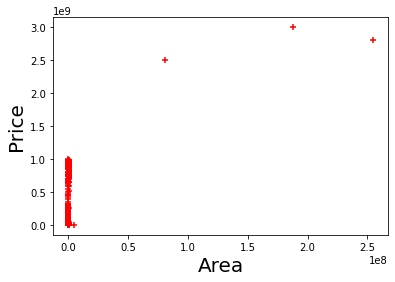

In [ ]:
plt.xlabel('Area',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.scatter(train.Area,train.Price,color='red',marker='+')

In [ ]:
train_df = train.drop('Price',axis='columns')
train_df.head()

,Area
0,1300.236407
1,1275.000000
2,933.159722
3,929.921143
4,999.009247


In [ ]:
price = train.Price
price

0        5500000.0
1        5100000.0
2        4300000.0
3        6250000.0
4        6050000.0
           ...    
29446    4500000.0
29447    1600000.0
29448    2710000.0
29449    6700000.0
29450    2780000.0
Name: Price, Length: 29451, dtype: float64

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(train_df,price)

LinearRegression()

In [ ]:
reg.predict([[33000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([14473484.20902852])

In [ ]:
m = reg.coef_
m

array([13.91210831])

In [ ]:
b = reg.intercept_
b

14014384.634954412

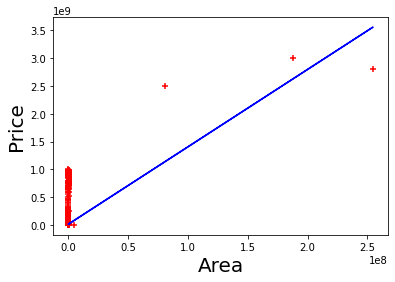

In [ ]:
plt.xlabel('Area',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.scatter(train.Area,train.Price,color='red',marker='+')
plt.plot(train_df.Area,reg.predict(train_df[['Area']]),color='blue')

In [ ]:
33000*m + b

array([14473484.20902852])

In [ ]:
reg.predict([[5000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([14083945.17648079])

In [ ]:
df_test = pd.read_csv('data/test.csv')

In [ ]:
test = pd.DataFrame(columns = ['Area','Price'])
test['Area'] = df_train[['SQUARE_FT']]
test['Price'] = df_train[['TARGET(PRICE_IN_LACS)']].apply(lambda x: x*100000)

In [ ]:
test.head()

,Area,Price
0,1300.236407,5500000.0
1,1275.000000,5100000.0
2,933.159722,4300000.0
3,929.921143,6250000.0
4,999.009247,6050000.0


In [ ]:
price_pred = reg.predict(test[['Area']])

#Linear Regression with multiple Features

In [69]:
df = pd.read_csv('homeprices.csv')
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [72]:
## Data preprocessing
## Calculate median to update null values in the bedrooms

import math
median_bedrooms = math.floor(df.bedrooms.median())
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [73]:
lr = linear_model.LinearRegression()

In [74]:
lr.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [81]:
lr.predict([[3500,4.0,40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([577828.35262931])

In [78]:
M = lr.coef_
b = lr.intercept_
M,b

(array([  112.06244194, 23388.88007794, -3231.71790863]), 221323.00186540396)

In [79]:
(M[0]*5000+M[1]*4.0+M[2]*5)+b

859032.1423446693